# 선형회귀

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 단순선형회귀 모델 만들기

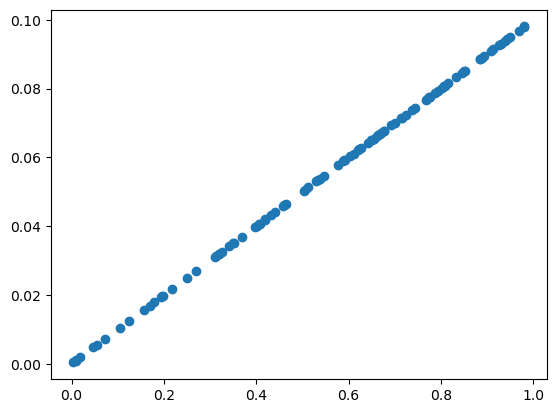

In [3]:
X = np.random.rand(100)
y = 0.2 * X * 0.5  #ax+b

plt.scatter(X,y)


In [4]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [5]:
# 경사하강법 y=wX+b , w결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 #임의 값

Epoch 0, W : -0.4595, Error : 1.5026


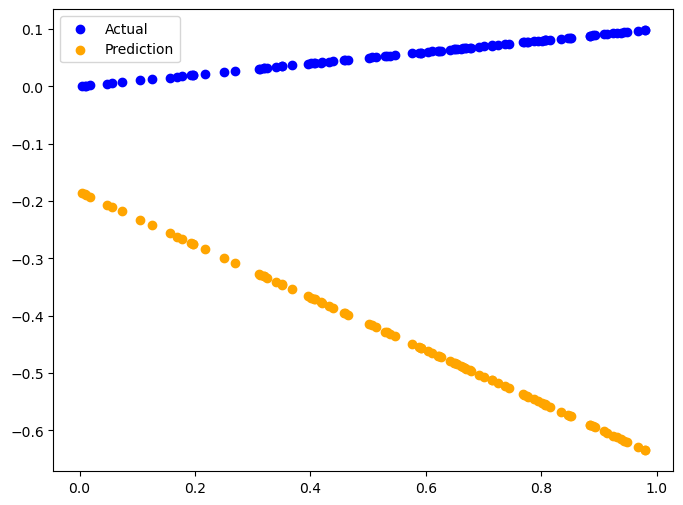

Epoch 10, W : -0.1526, Error : 0.0588


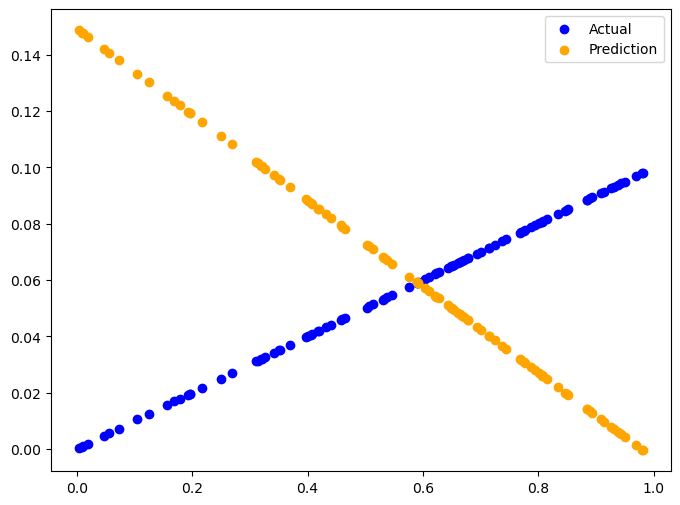

Epoch 20, W : -0.0911, Error : 0.0445


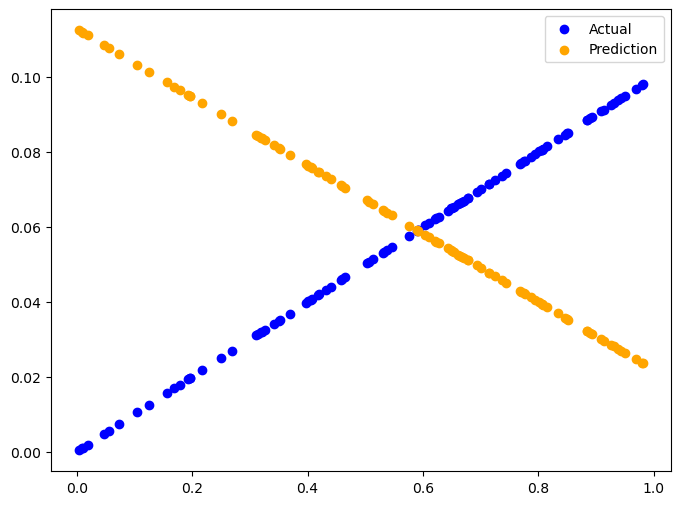

Epoch 30, W : -0.0445, Error : 0.0336


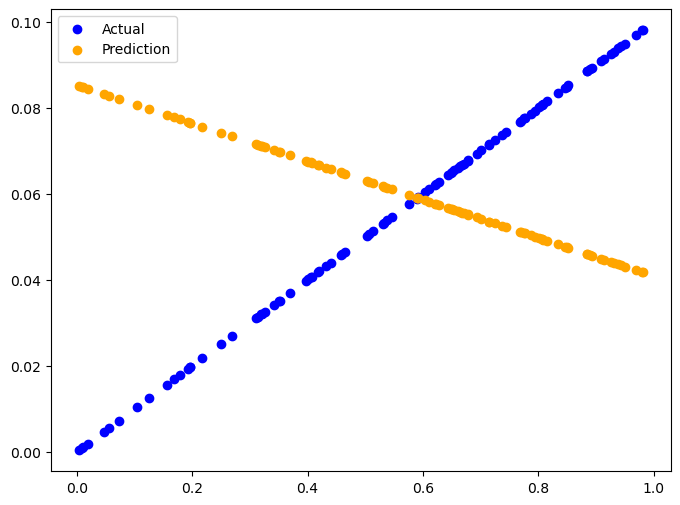

Epoch 40, W : -0.0093, Error : 0.0254


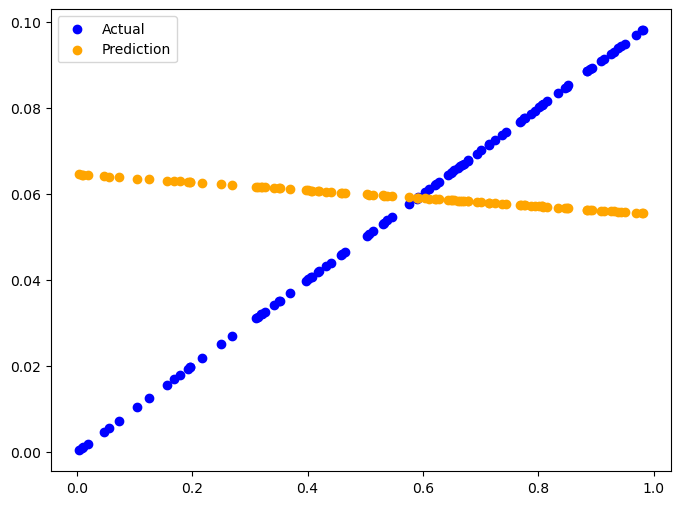

Epoch 50, W : 0.0174, Error : 0.0192


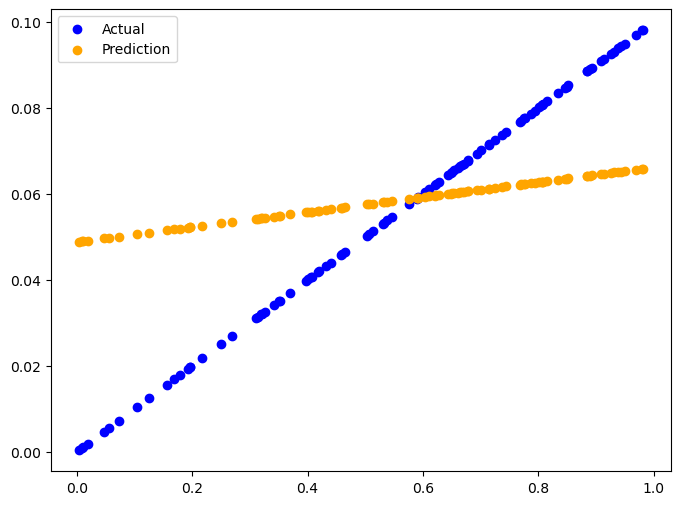

Epoch 60, W : 0.0375, Error : 0.0146


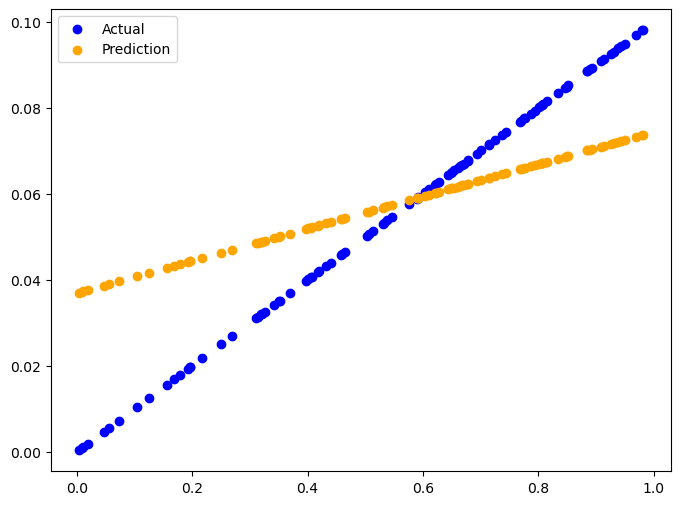

Epoch 70, W : 0.0527, Error : 0.0110


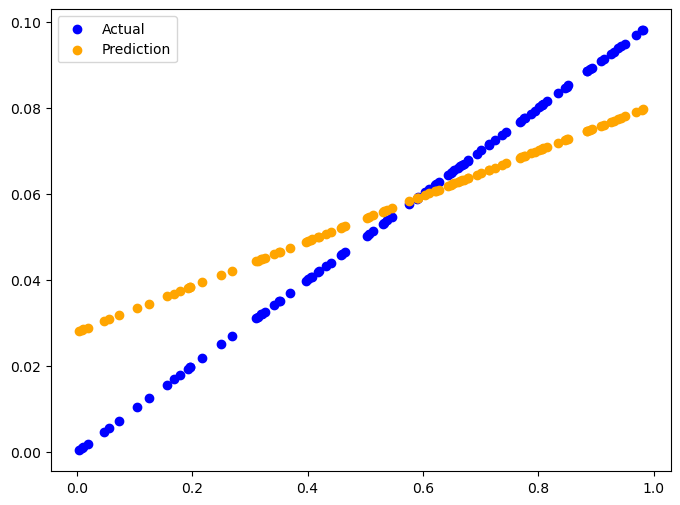

Epoch 80, W : 0.0643, Error : 0.0083


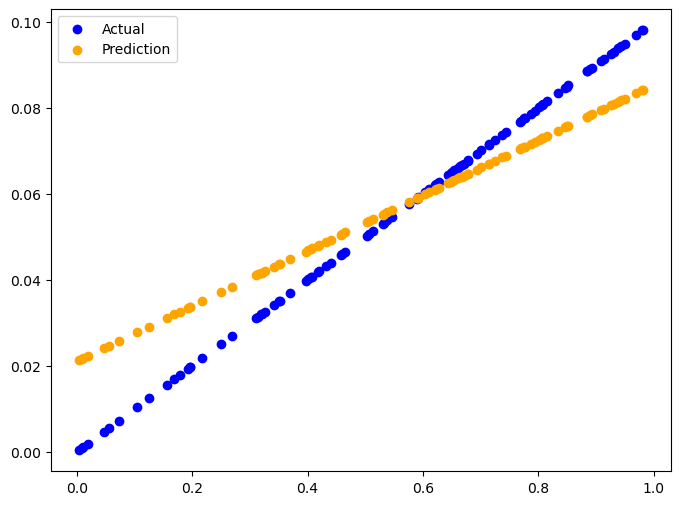

Epoch 90, W : 0.0730, Error : 0.0063


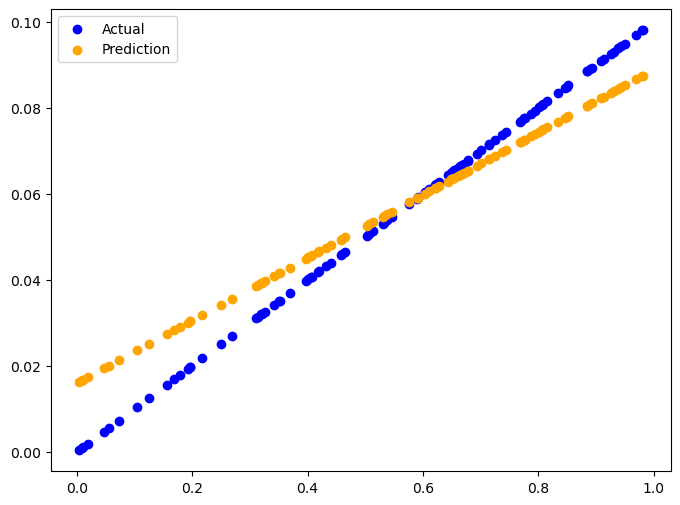

In [6]:
for epoch in range(100):
  y_pred = W * X + b
  error = np.abs(y_pred - y ).mean()
  if error < 0.001 : 
    break
  W_descent = learning_rate * ( (y_pred - y)*X).mean()
  b_descent = learning_rate * ( (y_pred - y).mean())
  W = W - W_descent
  b = b - b_descent
  
  if epoch%10 == 0 : 
    print( f'Epoch {epoch}, W : {W:.4f}, Error : {error:.4f}')
    y_pred = W * X + b
    plt_prediction(y_pred, y)
  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
bostonDF = pd.read_csv('data/boston.csv')
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [9]:
X = bostonDF.drop('target', axis=1).values
y = bostonDF['target'].values
bostonDF.shape

(506, 14)

In [10]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [12]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [13]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7572263323138934)

In [14]:
# 회귀식 
# W1, W0
lr.intercept_, lr.coef_

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = w0 + w1*X1 + w2*X2 + ... w13*X13

In [15]:
np.round(lr.intercept_, 1), np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [16]:
pd.Series(data = np.round(lr.coef_,1), 
          index=bostonDF.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [18]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE


(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [19]:
#R2
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차가 커지고(4.15 > 5.82 ), 결정계수는 작아진 결과

# 다항회귀 모델

y = w0 + w1X1 + w2X2 + w3X1^2 + w4X2^2

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
model_poly = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)), # 2차 다항식 변환, 절편 x
  ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [22]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(15.555752307472005)

In [23]:
r2_score(y_test, pred_poly)

np.float64(0.7816647163338353)

np.float64(0.7572263323138934)

2차~5차 다항회귀 시뮬레이션

In [ ]:
results = []
best_r2=-np.inf # 가장 높은 R2 점수를 저장하기 위한 초기값, -무한대로 설정
best_model = None
best_pred = None

for degree in range(1,5):
  model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly = model_poly.predict(X_test)
  mse = mean_squared_error(y_test, pred_poly)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, pred_poly)
  
  results.append({ 'degree':degree,
                  'MSE':mse,
                  'RMSE':rmse,
                  'R2': r2})
  if r2> best_r2:
    best_r2 = r2
    best_model = model_poly
    best_pred = pred_poly
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.592348,282.180071,-1116.597912
3,4,170599.948638,413.037466,-2393.483240


In [25]:
best_model.named_steps['poly'].degree


2

# 규제 회귀 모델

In [26]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [45]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred_ridge)
r2  = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(17.206833316177068), np.float64(0.7584907011357223))

In [29]:
# 다항 회귀 모델
# 15.5, 0.78

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5) # RidgeCV 릿지회귀 + 교차검증


In [31]:
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)

In [ ]:
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv mse: {ridge_mse:4f}, r2 : {ridge_r2:4f}')

ridge cv mse: 17.296260, r2 : 0.757236


In [ ]:
ridge_cv.alpha_ # 최적의 alpha 값

np.float64(0.001)

## Lasso alpha=0.1

In [34]:
lasso = Lasso(alpha=0.1)  # alpha 값 작으면 규제 약해짐
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

print("\n[라쏘 회귀]")
print("MSE:", mean_squared_error(y_test, pred_lasso))
print("R2:", r2_score(y_test, pred_lasso))


[라쏘 회귀]
MSE: 17.82879568373071
R2: 0.7497610474831454


## LassoCV

In [35]:
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

In [36]:
print(f"[개선 Lasso] 최적 alpha: {lasso_cv.alpha_}")
print(f"MSE: {lasso_mse:.3f}, R2: {lasso_r2:.3f}")

[개선 Lasso] 최적 alpha: 0.001
MSE: 17.283, R2: 0.757


In [ ]:
lasso_cv.coef_ # 회귀 계수들

array([-1.12661593e-01,  6.56008407e-02,  3.30878096e-02,  3.02619848e+00,
       -1.94682482e+01,  3.35481221e+00,  5.71239360e-03, -1.73664047e+00,
        3.55109529e-01, -1.43215477e-02, -9.16008532e-01,  1.04167858e-02,
       -5.66946541e-01])

In [38]:
ridge_cv.coef_

array([-1.12963267e-01,  6.55168621e-02,  3.43623266e-02,  3.04560180e+00,
       -1.97781295e+01,  3.35506472e+00,  5.92317536e-03, -1.74158450e+00,
        3.55842743e-01, -1.42968313e-02, -9.19951783e-01,  1.03976785e-02,
       -5.66214215e-01])

lasso 모델에서 제거된 변수는 없다.

# 엘라스틱넷

In [39]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [40]:
enet_pred = enet.predict(X_test)
print("\n[엘라스틱넷 회귀]")
print("MSE:", mean_squared_error(y_test, enet_pred))
print("R2:", r2_score(y_test, enet_pred))


[엘라스틱넷 회귀]
MSE: 18.11673827943616
R2: 0.7457195824951279


# 모델 성능 비교

In [41]:
results = pd.DataFrame({
  '모델' : ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
  'MSE': [ mean_squared_error(y_test, pred_poly),
          mean_squared_error(y_test, pred_ridge),
          mean_squared_error(y_test, pred_lasso),
          mean_squared_error(y_test, enet_pred),
        ],
  'R2': [r2_score(y_test, best_pred),
          r2_score(y_test, pred_ridge),
          r2_score(y_test, pred_lasso),
          r2_score(y_test, enet_pred),
  ]
})
results

,모델,MSE,R2
0,다항회귀,170599.948638,0.781665
1,릿지회귀,17.206833,0.758491
2,라쏘회귀,17.828796,0.749761
3,엘라스틱넷회귀,18.116738,0.745720
